# Importing libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# Loading the data

In [219]:
balls=pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
matches=pd.read_csv('/content/IPL_Matches_2008_2022.csv')

In [220]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [221]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [222]:
balls.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,225954.0,832047.003257,337954.245970,335982.0,501262.0,829737.0,1178395.0,1312200.0
innings,225954.0,1.483868,0.503104,1.0,1.0,1.0,2.0,6.0
overs,225954.0,9.185679,5.681797,0.0,4.0,9.0,14.0,19.0
ballnumber,225954.0,3.619750,1.810633,1.0,2.0,4.0,5.0,10.0
batsman_run,225954.0,1.243523,1.618166,0.0,0.0,1.0,1.0,6.0
extras_run,225954.0,0.066907,0.341470,0.0,0.0,0.0,0.0,7.0
total_run,225954.0,1.310430,1.606050,0.0,0.0,1.0,1.0,7.0
non_boundary,225954.0,0.000093,0.009640,0.0,0.0,0.0,0.0,1.0
isWicketDelivery,225954.0,0.049351,0.216600,0.0,0.0,0.0,0.0,1.0


In [223]:
balls.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [224]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [225]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [226]:
matches.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [227]:
matches["City"].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [228]:
matches["Team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [229]:
matches.shape[0]

950

In [230]:
matches['Season']=pd.DatetimeIndex(matches["Date"]).year

# Data Visualization

### Matches per season

In [231]:
matches_per_season=matches.groupby(["Season"])["ID"].count().reset_index().rename(columns={"ID":"Matches"})
print(matches_per_season)

    Season  Matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2020       60
13    2021       60
14    2022       74


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



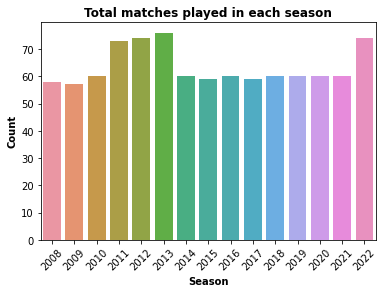

In [232]:
sns.countplot(matches["Season"])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Total matches played in each season", fontsize=12,fontweight="bold")
plt.show()

### Which team has won more times

In [233]:
winning_team=matches.groupby(["WinningTeam"])["ID"].count().reset_index().rename(columns={"ID":"Matches Won"})
print(winning_team)

                    WinningTeam  Matches Won
0           Chennai Super Kings          121
1               Deccan Chargers           29
2                Delhi Capitals           36
3              Delhi Daredevils           67
4                 Gujarat Lions           13
5                Gujarat Titans           12
6               Kings XI Punjab           88
7          Kochi Tuskers Kerala            6
8         Kolkata Knight Riders          114
9          Lucknow Super Giants            9
10               Mumbai Indians          131
11                Pune Warriors           12
12                 Punjab Kings           13
13             Rajasthan Royals           96
14       Rising Pune Supergiant           10
15      Rising Pune Supergiants            5
16  Royal Challengers Bangalore          109
17          Sunrisers Hyderabad           75


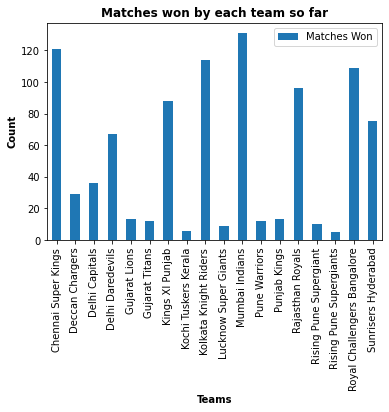

In [234]:
winning_team["Percentage"]=((winning_team["Matches Won"]/winning_team["Matches Won"].sum())*100).sort_values()
winning_team.plot(x="WinningTeam",y="Matches Won",kind='bar')
plt.xlabel("Teams", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Matches won by each team so far", fontsize=12,fontweight="bold")
plt.show()

Mumbai Indians has the highest winning rate(131)followed by Chennai Super Kings,Kolkata Knight Riders and Royal Challengers Banglore(121,114,109 Matches won respectively)

### Which Stadium is best for the teams who are batting first

In [235]:
stadium=matches[["Venue","Team1","Team2","TossWinner","TossDecision","WinningTeam"]]
stadium["TossLosser"]=matches["Team1"]
stadium.loc[stadium["TossWinner"]!=stadium["Team1"],"TossLosser"]=stadium["Team1"]
stadium

,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,TossLosser
0,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,Rajasthan Royals
1,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore
3,"Eden Gardens, Kolkata",Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,Rajasthan Royals
4,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad
...,...,...,...,...,...,...,...
945,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,Kolkata Knight Riders
946,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians
947,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,Delhi Daredevils
948,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,Kings XI Punjab


In [236]:
stadium.loc[stadium["TossDecision"]=="bat","BattingTeam"]=stadium["TossWinner"]
stadium.loc[stadium["TossDecision"]=="field","BattingTeam"]=stadium["TossLosser"]
stadium=stadium.drop(columns=["Team1","Team2","TossDecision","TossWinner","TossLosser"])
stadium.loc[stadium["WinningTeam"]==stadium["BattingTeam"],"BattingWin"]=1
stadium.loc[stadium["WinningTeam"]!=stadium["BattingTeam"],"BattingWin"]=0
stadium

,Venue,WinningTeam,BattingTeam,BattingWin
0,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,0.0
1,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Royal Challengers Bangalore,0.0
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Royal Challengers Bangalore,1.0
3,"Eden Gardens, Kolkata",Gujarat Titans,Rajasthan Royals,0.0
4,"Wankhede Stadium, Mumbai",Punjab Kings,Sunrisers Hyderabad,0.0
...,...,...,...,...
945,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,0.0
946,Wankhede Stadium,Royal Challengers Bangalore,Mumbai Indians,0.0
947,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,0.0
948,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Chennai Super Kings,1.0


In [237]:
batting_win=stadium[stadium["BattingWin"]==1]
batting_win=batting_win.drop(columns=["BattingWin"])
batting_losses=stadium[stadium["BattingWin"]==0]
batting_losses=batting_losses.drop(columns=["BattingWin"])
batting_win

,Venue,WinningTeam,BattingTeam
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Royal Challengers Bangalore
8,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,Lucknow Super Giants
9,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Sunrisers Hyderabad
10,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,Delhi Capitals
11,"Brabourne Stadium, Mumbai",Rajasthan Royals,Rajasthan Royals
...,...,...,...
933,Feroz Shah Kotla,Delhi Daredevils,Delhi Daredevils
935,M Chinnaswamy Stadium,Chennai Super Kings,Chennai Super Kings
940,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kings XI Punjab
942,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Chennai Super Kings


In [238]:
x=batting_win.groupby("Venue")["Venue"].count()
y=batting_losses.groupby("Venue")["Venue"].count()

In [239]:
import plotly.express as px
fig= px.bar(batting_win['Venue'],width=1000, height=900)
fig.show()

In [240]:
matches.Venue[matches.WonBy != "Wickets"].mode()

0    Wankhede Stadium
dtype: object

***Wankhede Stadium is best for those teams who are batting first***




### Which stadium is best for winning wickets

In [241]:
import plotly.express as px
fig= px.bar(batting_losses['Venue'],width=1000, height=900)
fig.show()

In [242]:
matches.Venue[matches.WonBy != "Runs"].mode()

0    Eden Gardens
dtype: object

***If a team is fielding first then there are high chances of them to win in Eden Garden***

### Which Stadium has played the most matches

In [243]:
player=matches[["Venue"]]
player

,Venue
0,"Narendra Modi Stadium, Ahmedabad"
1,"Narendra Modi Stadium, Ahmedabad"
2,"Eden Gardens, Kolkata"
3,"Eden Gardens, Kolkata"
4,"Wankhede Stadium, Mumbai"
...,...
945,Eden Gardens
946,Wankhede Stadium
947,Feroz Shah Kotla
948,"Punjab Cricket Association Stadium, Mohali"


In [244]:
fig= px.bar(matches['Venue'],width=1000, height=900)
fig.show()

***Eden Gardens Stadium has played the most matches***

### Who wins the most player of the matches in the tournament?

In [245]:
player=matches[["Player_of_Match"]]
player

,Player_of_Match
0,HH Pandya
1,JC Buttler
2,RM Patidar
3,DA Miller
4,Harpreet Brar
...,...
945,DJ Hussey
946,MV Boucher
947,MF Maharoof
948,MEK Hussey


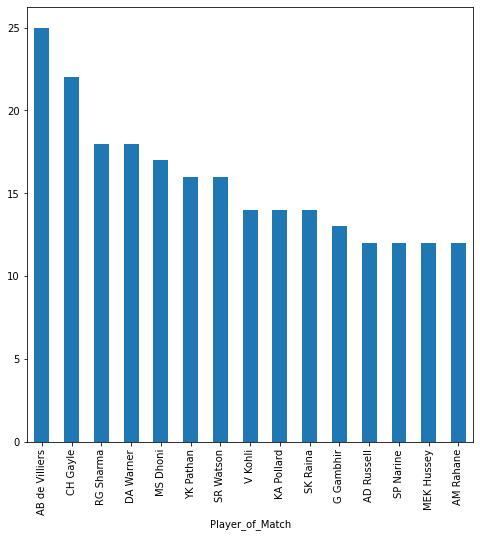

In [246]:
plt.figure(figsize=(8,8))
player_of_match=player.groupby("Player_of_Match")["Player_of_Match"].count().sort_values(ascending=False)
player_of_match[:15].plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

***Best Player is AB de Villers and he won the most player of the match (25) times***

### Number of tosses won by each team

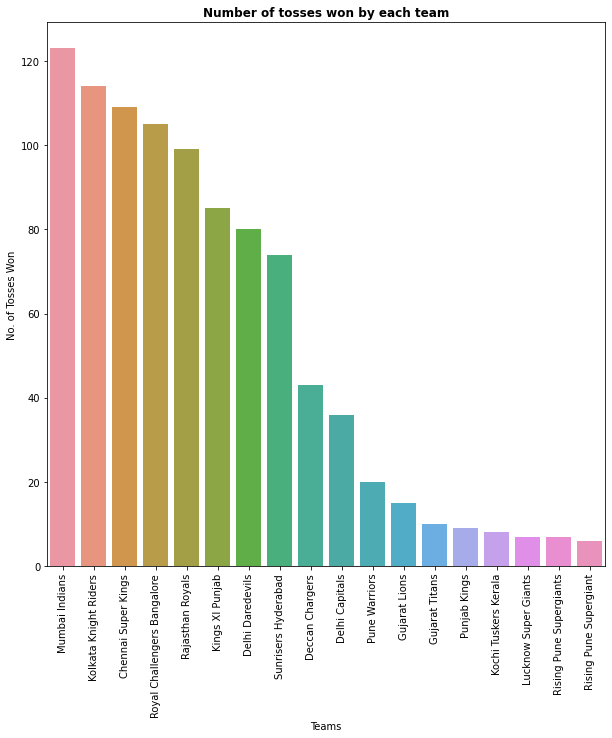

In [247]:
toss=matches["TossWinner"].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=toss.index,y=toss)
plt.title("Number of tosses won by each team",fontsize=12,fontweight="bold")
plt.xlabel("Teams")
plt.ylabel("No. of Tosses Won")
plt.xticks(rotation='vertical')
plt.show()

###  Decisions of the toss winning teams

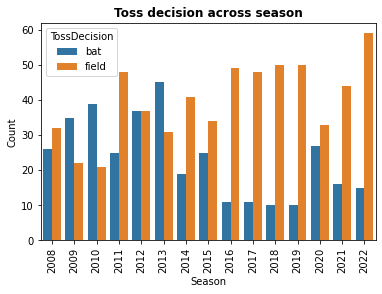

In [248]:
sns.countplot(x="Season",hue="TossDecision",data=matches)
plt.xticks(rotation='vertical')
plt.title("Toss decision across season",fontsize=12,fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

***The above plot shows the toss decision of the toss winning team***

Details about Winning Teams

In [249]:
matches["WonBy"].value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

***from the above data we get to know that most of the matches are won by wickets. And 4 ties so far***

### Best Chasing Team

In [250]:
matches.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [251]:
matches.WinningTeam[matches.WonBy!='Runs'].mode()

0    Kolkata Knight Riders
dtype: object

***Kolkata Knight Riders is the best chasing team***

### Best Defending Team

In [252]:
matches.WinningTeam[matches.WonBy!='Wickets'].mode()

0    Mumbai Indians
dtype: object

***Mumbai Indian is the best defending team***

### Best Teams in last 5 seasons

In [253]:
seasons=matches["Season"].unique()
seasons

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008])

In [254]:
for i in range(2016,2022):
    x=statistics.mode(matches.WinningTeam[matches.Season== i])
   
    print(i,":",x)

2016 : Sunrisers Hyderabad
2017 : Mumbai Indians
2018 : Chennai Super Kings
2019 : Mumbai Indians
2020 : Mumbai Indians
2021 : Chennai Super Kings


### Best Players in Season 2020

In [255]:
print(matches.Player_of_Match[matches.Season== 2020].mode())

0    AB de Villiers
1          KL Rahul
2        RD Gaikwad
3          TA Boult
dtype: object


### Does Winning the toss means winning the match

In [256]:
toss=(matches["TossWinner"]==matches["WinningTeam"])
toss.mode()

0    True
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



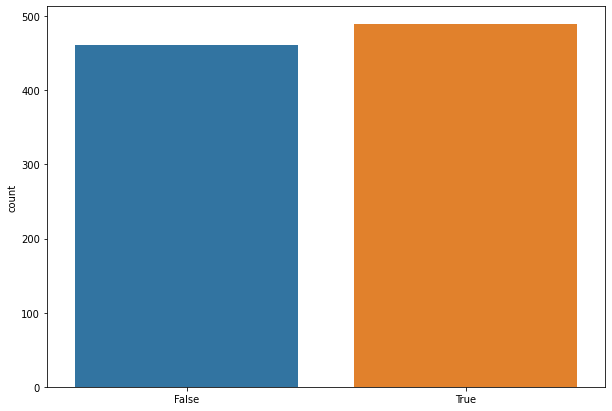

In [257]:
plt.figure(figsize=(10,7))
sns.countplot(toss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



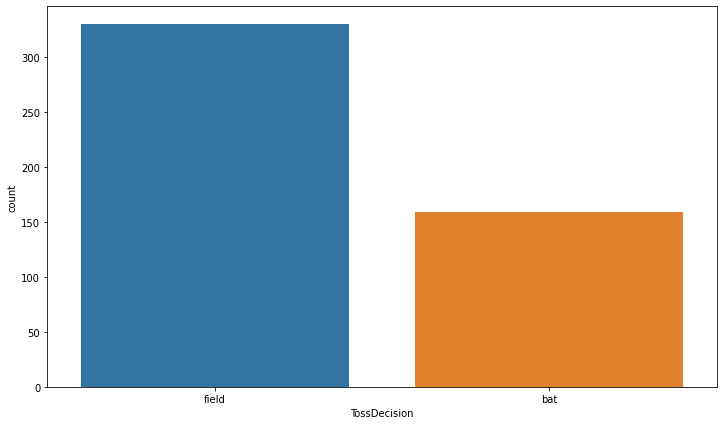

In [258]:
plt.figure(figsize=(12,7))
sns.countplot(matches.TossDecision[matches.TossWinner==matches.WinningTeam])
plt.show()

***Toss Winning teams mostly decided to field first, whichs hepls to win the match. As there are higher chances of winning when fielding first***

### How a player has performed thoughout IPL 

Lets see for Suraish Raina

In [259]:
Player=(balls['batter']=='SK Raina')
df_raina=balls[Player]
df_raina.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
19117,1254113,2,14,2,SK Raina,YS Chahal,AT Rayudu,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
19118,1254113,2,14,3,SK Raina,YS Chahal,AT Rayudu,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
19120,1254113,2,14,5,SK Raina,YS Chahal,AT Rayudu,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
19121,1254113,2,14,6,SK Raina,YS Chahal,AT Rayudu,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
19130,1254113,2,16,3,SK Raina,PWH de Silva,MS Dhoni,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


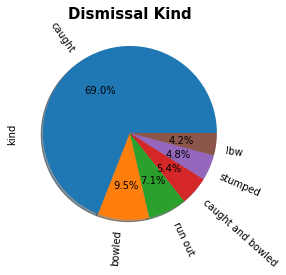

In [260]:
df_raina['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontsize=15,fontweight="bold")
plt.show()

In [261]:
def count(df_raina,runs):
    return len(df_raina['batsman_run']==runs)*runs
print("Runs scored for 1's : ", count(df_raina,1))
print("Runs scored for 2's : ", count(df_raina,2))
print("Runs scored for 3's : ", count(df_raina,3))
print("Runs scored for 4's : ", count(df_raina,4))
print("Runs scored for 6's : ", count(df_raina,6))

Runs scored for 1's :  4177
Runs scored for 2's :  8354
Runs scored for 3's :  12531
Runs scored for 4's :  16708
Runs scored for 6's :  25062


### Details of the match that has biggest win in the run margin:

In [262]:
matches[matches["Margin"]==matches["Margin"].max()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
329,1082635,Delhi,2017-05-06,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,NaN,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


***Mumbai Indians defeated Delhi Daredevils by 146 runs, the largest margin of victory in the IPL.***

### Runs in each season

In [263]:
season_data=matches[["ID","Season"]].merge(balls,left_on="ID",right_on="ID", how="left").drop("ID", axis=1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


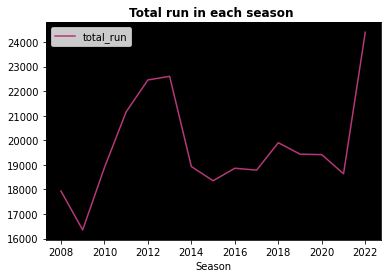

In [264]:
season=season_data.groupby(["Season"])["total_run"].sum().reset_index()
p=season.set_index("Season")
ax=plt.axes()
ax.set(facecolor="black")

sns.lineplot(data=p,palette="magma")
plt.title("Total run in each season ", fontsize=12, fontweight="bold")
plt.show()

In [265]:
run_per_season=pd.concat([matches_per_season,season.iloc[:,1]],axis=1)
run_per_season["Runs Scored per match"]=run_per_season["total_run"]/run_per_season["Matches"]
run_per_season.set_index("Season",inplace=True)
run_per_season

,Matches,total_run,Runs Scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


### Which player have scored maximum run so far in IPL

In [266]:
balls.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [267]:
runs=balls.groupby(["batter"])["batsman_run"].sum().sort_values(ascending=False).reset_index()
runs.columns=["Batsman","Runs"]
y=runs.head(10)
y

,Batsman,Runs
0,V Kohli,6634
1,S Dhawan,6244
2,DA Warner,5883
3,RG Sharma,5881
4,SK Raina,5536
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4978
8,RV Uthappa,4954
9,KD Karthik,4377


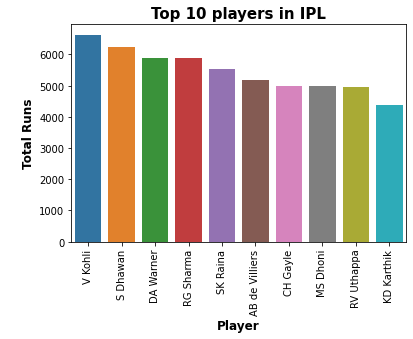

In [268]:
sns.barplot(x=y["Batsman"],y=y["Runs"])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Player',fontsize=12,fontweight="bold")
plt.ylabel('\nTotal Runs',fontsize=12,fontweight="bold")
plt.title("Top 10 players in IPL", fontsize=15, fontweight="bold")
plt.show()

***Virat Kohli has scored maximum runs in IPL***

# EDA and Feature Engineering

### Finding total score of the innings

In [269]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [270]:
total_score=balls.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


our target is winner prediction so we only need the score of first innings

In [271]:
total_score = total_score[total_score['innings']==1]
total_score

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [272]:
total_score['target'] = total_score['total_run'] + 1

Merge with the mathces dataset

In [273]:
match_df = matches.merge(total_score[['ID','target']], on='ID')

In [274]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,111
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166
947,335984,Delhi,2008-04-19,2008,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,130
948,335983,Chandigarh,2008-04-19,2008,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,241


### Removing the old teams and updating new names

In [275]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [276]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [277]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')


match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [278]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]
match_df = match_df[match_df['WinningTeam'].isin(teams)]

In [279]:
match_df.shape

(832, 21)

In [280]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

### Removing all matches effected due to rain (D/L)

In [281]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [282]:
match_df['method'].value_counts()


D/L    15
Name: method, dtype: int64

In [283]:
match_df = match_df[match_df['method'].isna()]

In [284]:
match_df.shape

(817, 21)

In [285]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [286]:
match_df = match_df[['ID','City','Team1','Team2','WinningTeam','target']].dropna()

In [287]:
match_df.head()

,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158


In [288]:
match_df.isna().sum()

ID             0
City           0
Team1          0
Team2          0
WinningTeam    0
target         0
dtype: int64

Merge the match_df dataset with balls dataset

In [289]:
balls.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [290]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

balls = balls[balls['BattingTeam'].isin(teams)]

In [291]:
balls_df = match_df.merge(balls, on='ID')

In [292]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


Only select rows where we are in 2nd innings

In [293]:
balls_df = balls_df[balls_df['innings']==2]

In [294]:
balls_df.shape

(89044, 22)

In [295]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


### Create new row current_score after each ball

In [296]:
balls_df['current_score'] = balls_df.groupby('ID')['total_run'].cumsum()

In [297]:
balls_df

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183743,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80
183744,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
183745,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
183746,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82


In [298]:
balls_df['runs_left'] = np.where(balls_df['target']-balls_df['current_score']>=0, balls_df['target']-balls_df['current_score'], 0)

In [299]:
balls_df

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183743,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143
183744,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142
183745,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142
183746,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141


In [300]:
balls_df['balls_left'] = np.where(120 - balls_df['overs']*6 - balls_df['ballnumber']>=0,120 - balls_df['overs']*6 - balls_df['ballnumber'], 0)

In [301]:
balls_df['wickets_left'] = 10 - balls_df.groupby('ID')['isWicketDelivery'].cumsum()

In [302]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left'],
      dtype='object')

In [303]:
balls_df['current_run_rate'] = (balls_df['current_score']*6)/(120-balls_df['balls_left'])

In [304]:
balls_df['required_run_rate'] = np.where(balls_df['balls_left']>0, balls_df['runs_left']*6/balls_df['balls_left'], 0)

In [305]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate'],
      dtype='object')

In [306]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [307]:
balls_df['result'] = balls_df.apply(result, axis=1)

In [308]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1


In [309]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'result'],
      dtype='object')

In [310]:
index1 = balls_df[balls_df['Team2']==balls_df['BattingTeam']]['Team1'].index
index2 = balls_df[balls_df['Team1']==balls_df['BattingTeam']]['Team2'].index

In [311]:
balls_df.loc[index1, 'BowlingTeam'] = balls_df.loc[index1, 'Team1']
balls_df.loc[index2, 'BowlingTeam'] = balls_df.loc[index2, 'Team2']

In [312]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,...,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,...,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,...,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1,Rajasthan Royals


In [313]:
final_df = balls_df[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]

In [314]:
final_df

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.000000,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.000000,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.000000,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.500000,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.200000,6.782609,131,1
...,...,...,...,...,...,...,...,...,...,...
183743,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,143,31,1,5.393258,27.677419,223,0
183744,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,30,1,5.400000,28.400000,223,0
183745,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,29,1,5.340659,29.379310,223,0
183746,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,29,1,5.406593,29.172414,223,0


Randomly shuffle all the rows



In [315]:
final_df.sample(final_df.shape[0])

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
131049,Mumbai Indians,Sunrisers Hyderabad,Visakhapatnam,19,8,6,6.428571,14.250000,139,1
116075,Sunrisers Hyderabad,Delhi Capitals,Delhi,7,9,3,5.837838,4.666667,115,1
182297,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,80,69,9,7.411765,6.956522,143,1
131017,Mumbai Indians,Sunrisers Hyderabad,Visakhapatnam,63,40,7,5.700000,9.450000,139,1
88230,Royal Challengers Bangalore,Rajasthan Royals,Ahmedabad,70,77,9,8.511628,5.454545,131,1
...,...,...,...,...,...,...,...,...,...,...
21242,Delhi Capitals,Mumbai Indians,Sharjah,11,12,4,6.611111,5.500000,130,1
7378,Mumbai Indians,Rajasthan Royals,Navi Mumbai,137,108,10,11.000000,7.611111,159,1
141452,Punjab Kings,Chennai Super Kings,Chandigarh,155,99,10,9.714286,9.393939,189,1
156444,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,4,17,8,7.689320,1.411765,136,1


In [316]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
72585,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,196,111,10,8.0,10.594595,208,0


# Model building

### Train Test Split

In [317]:
from sklearn.model_selection import train_test_split

X = final_df.drop('result', axis=1)
y = final_df['result']

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=1)

In [319]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target
70508,Punjab Kings,Sunrisers Hyderabad,Hyderabad,17,14,3,8.094340,7.285714,160
145023,Royal Challengers Bangalore,Mumbai Indians,Bangalore,157,81,8,5.384615,11.629630,192
79640,Mumbai Indians,Kolkata Knight Riders,Kolkata,22,18,7,9.764706,7.333333,188
39006,Mumbai Indians,Kolkata Knight Riders,Mumbai,89,90,10,9.000000,5.933333,134
36153,Rajasthan Royals,Mumbai Indians,Abu Dhabi,80,27,3,7.354839,17.777778,194
...,...,...,...,...,...,...,...,...,...
44359,Rajasthan Royals,Punjab Kings,Chandigarh,50,17,5,7.747573,17.647059,183
151317,Kolkata Knight Riders,Delhi Capitals,Delhi,128,71,6,6.122449,10.816901,178
103386,Delhi Capitals,Chennai Super Kings,Abu Dhabi,170,108,10,4.000000,9.444444,178
10801,Kolkata Knight Riders,Rajasthan Royals,Mumbai,70,40,7,11.100000,10.500000,218


### One hot encoding

In [320]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')

### Model Selection

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [322]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [323]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [324]:
y_pred = pipe.predict(X_test)

In [325]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8175182481751825

In [326]:
pipe.predict_proba(X_test)[1]

array([0.27304235, 0.72695765])

In [334]:
teams

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [335]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))